### 라이브러리 임포트

In [2]:
from PIL import ImageFont, ImageDraw, Image
import cv2              # OpenCV로 이미지 정제
import pytesseract      # OCR을 할 메인 엔진
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### 텍스트 추출

In [10]:
test1_path = r'C:\ITStudy\100_SelfProject\2nd_TechSeminar\Data\Tesseract_set\test_1.png'
test2_path = r'D:\ITStudy\10_WooriFISA\2nd_Tech_Seminar\Data\Tesseract_set\test_2.png'
test3_path = r'D:\ITStudy\10_WooriFISA\2nd_Tech_Seminar\Data\Tesseract_set\test_3.png'
panel_path = r'D:\ITStudy\10_WooriFISA\2nd_Tech_Seminar\Data\panel2.jpg'
image = Image.open(panel_path)
text = pytesseract.image_to_string(image, lang='kor+eng')

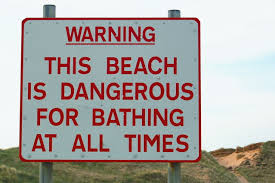

In [11]:
image

In [5]:
print(text)

Hello, How are you today?
I’m fine thanky & you?

Hi, there. ’m 김성현



### 이미지 시각화

In [5]:
def tesseract_ocr_extract(image_path):
    
    image = cv2.imread(image_path)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pytesseract.image_to_data(rgb, output_type=pytesseract.Output.DICT)

    return_list = [{
            "left": results["left"][i],
            "top": results["top"][i],
            "width": results["width"][i],
            "height": results["height"][i],
            "text": results["text"][i],
            "confidence": int(results["conf"][i])
            } for i in range(len(results["text"]))]
    
    return return_list

In [12]:
box_list = tesseract_ocr_extract(panel_path)

In [8]:
# 테서렉트가 분석하면서 회차별로 정보를 저장한 box_list
box_list

[{'left': 0,
  'top': 0,
  'width': 1919,
  'height': 1079,
  'text': '',
  'confidence': -1},
 {'left': 74,
  'top': 199,
  'width': 1697,
  'height': 291,
  'text': '',
  'confidence': -1},
 {'left': 74,
  'top': 199,
  'width': 1697,
  'height': 291,
  'text': '',
  'confidence': -1},
 {'left': 79,
  'top': 199,
  'width': 1692,
  'height': 133,
  'text': '',
  'confidence': -1},
 {'left': 79,
  'top': 202,
  'width': 358,
  'height': 125,
  'text': 'Hello,',
  'confidence': 96},
 {'left': 492,
  'top': 204,
  'width': 273,
  'height': 102,
  'text': 'How',
  'confidence': 96},
 {'left': 806,
  'top': 229,
  'width': 206,
  'height': 77,
  'text': 'are',
  'confidence': 96},
 {'left': 1052,
  'top': 229,
  'width': 225,
  'height': 103,
  'text': 'you',
  'confidence': 96},
 {'left': 1323,
  'top': 199,
  'width': 448,
  'height': 133,
  'text': 'today?',
  'confidence': 95},
 {'left': 74,
  'top': 351,
  'width': 1437,
  'height': 139,
  'text': '',
  'confidence': -1},
 {'left': 7

In [9]:
df = pd.DataFrame(box_list)

print(df)

    left  top  width  height    text  confidence
0      0    0   1919    1079                  -1
1     74  199   1697     291                  -1
2     74  199   1697     291                  -1
3     79  199   1692     133                  -1
4     79  202    358     125  Hello,          96
5    492  204    273     102     How          96
6    806  229    206      77     are          96
7   1052  229    225     103     you          96
8   1323  199    448     133  today?          95
9     74  351   1437     139                  -1
10    74  351    196     111     I’m          83
11   316  359    241     105    fine          93
12   600  360    437     130  thanky          92
13  1082  361     82     103       &          93
14  1204  357    307     133    you?          96
15   613  722   1213     134                  -1
16   613  722   1213     134                  -1
17   613  722   1213     134                  -1
18   613  730    153     126     Hi,          95
19   814  731    375

In [10]:
print(df[['text', 'confidence']])

      text  confidence
0                   -1
1                   -1
2                   -1
3                   -1
4   Hello,          96
5      How          96
6      are          96
7      you          96
8   today?          95
9                   -1
10     I’m          83
11    fine          93
12  thanky          92
13       &          93
14    you?          96
15                  -1
16                  -1
17                  -1
18     Hi,          95
19  there.          87
20      ’m          59
21      ZY           0


In [13]:
try:
    font = ImageFont.truetype("malgun.ttf", 15)
except IOError:
    font = ImageFont.load_default() # 폰트 파일이 없을 경우 기본 폰트 사용

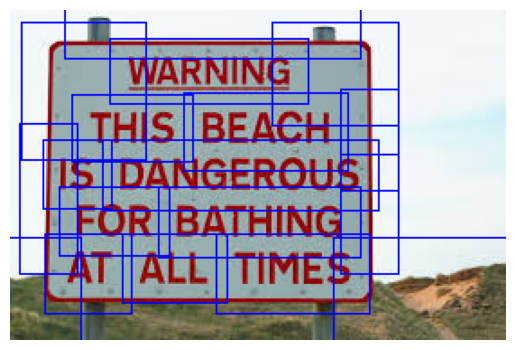

In [16]:
total_image = image.copy()
draw = ImageDraw.Draw(total_image)
margin = 10 
output_filename = 'panel full box.png'
# 인식된 텍스트와 바운딩 박스를 이미지에 그리기
for bbox in box_list:
    if bbox['text'] == '':
        continue

    top_left = tuple((bbox['left']- margin, bbox['top']- margin))
    bottom_right = tuple((bbox['left']+bbox['width']+ margin, bbox['top']+bbox['height']+ margin))

    # 바운딩 박스 그리기
    draw.rectangle((top_left, bottom_right), outline="blue", width=1)

    # # 텍스트 그리기 (박스 위에 위치)
    # text_position = (top_left[0], top_left[1] - 20)
    # draw.text(text_position, text, font=font, fill="black")

# 결과 이미지 출력
# plt.figure(figsize=(10, 6))
plt.imshow(total_image)
plt.axis('off')  # 축 눈금 숨기기
plt.savefig(
    output_filename,
    dpi=300,  # 해상도(Dots Per Inch) 설정
    bbox_inches='tight' # 그래프 주변의 불필요한 여백을 최소화
)
plt.show()

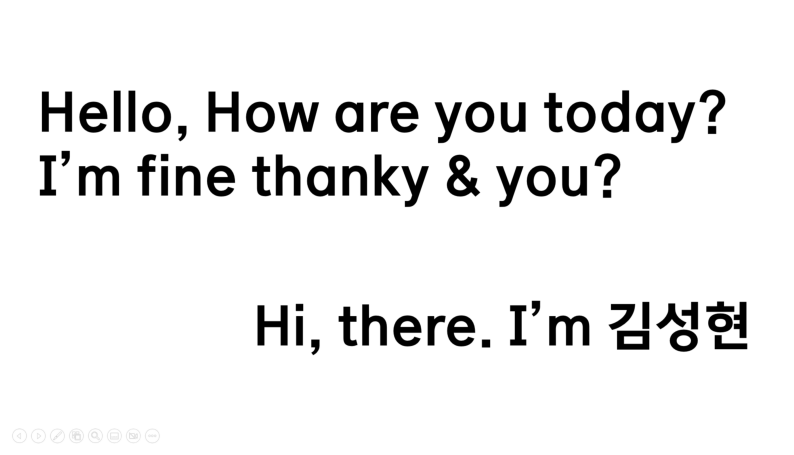

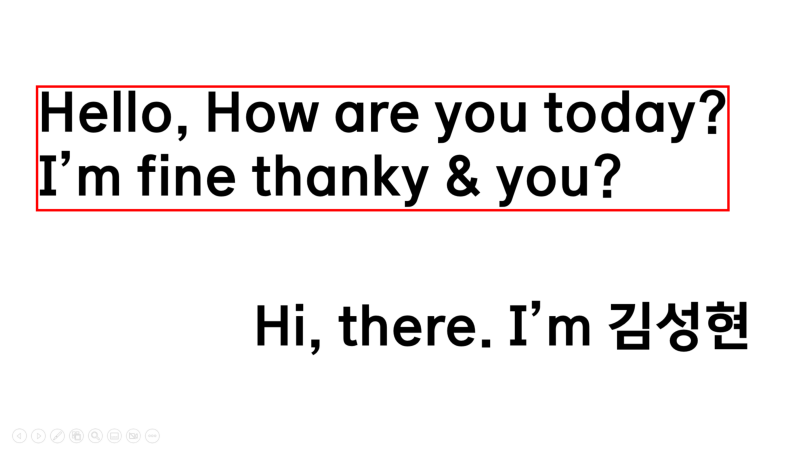

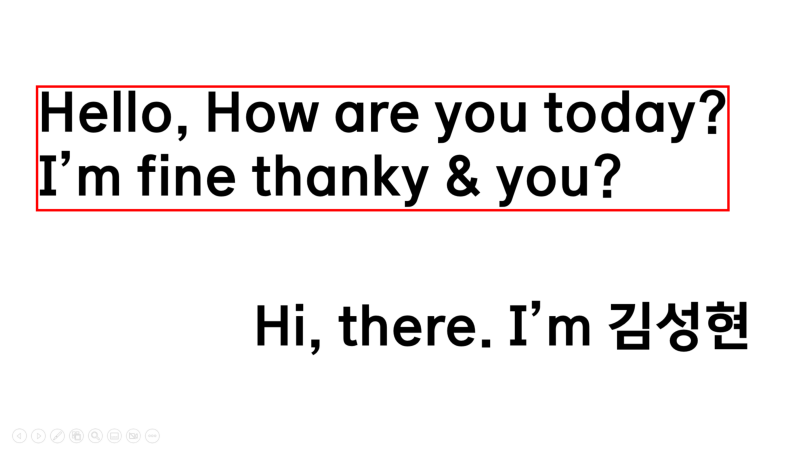

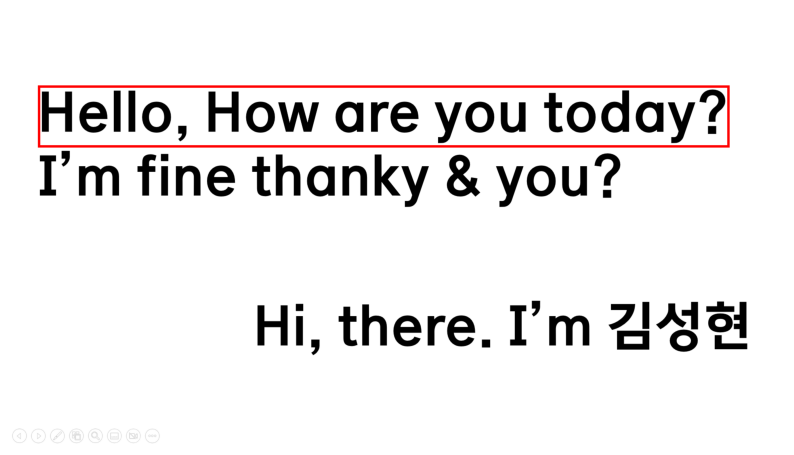

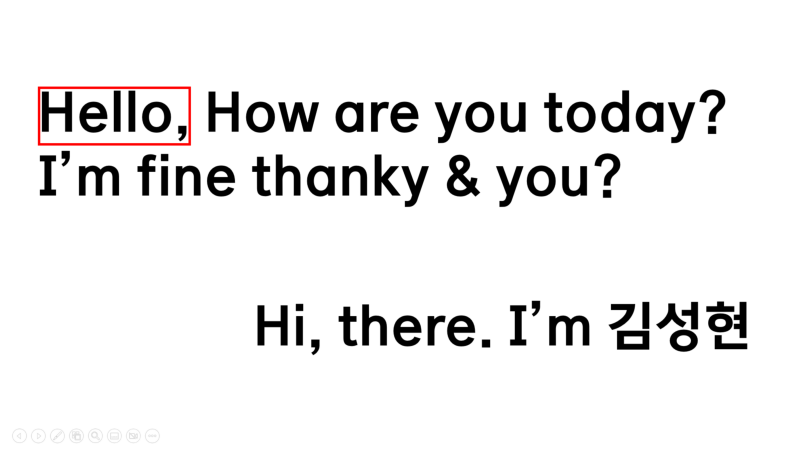

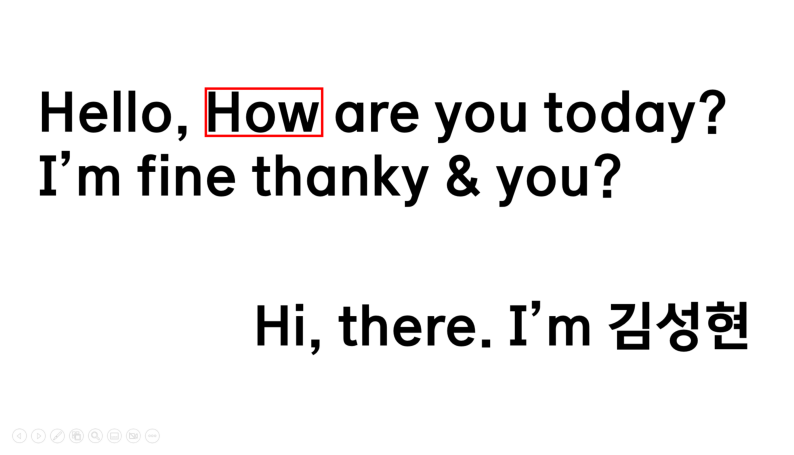

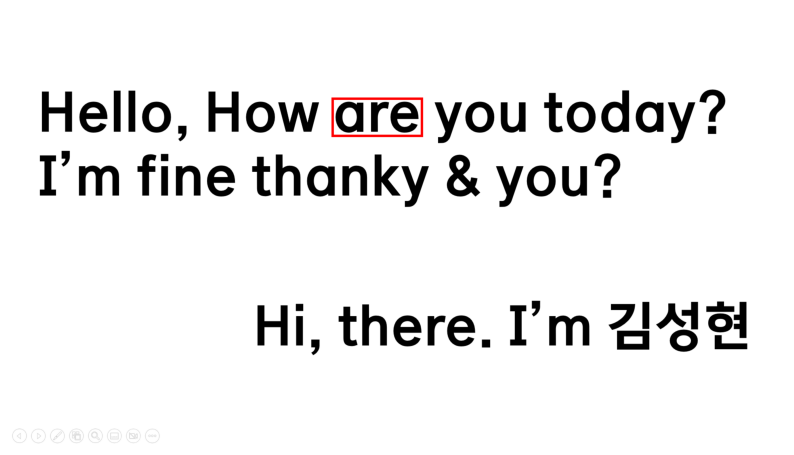

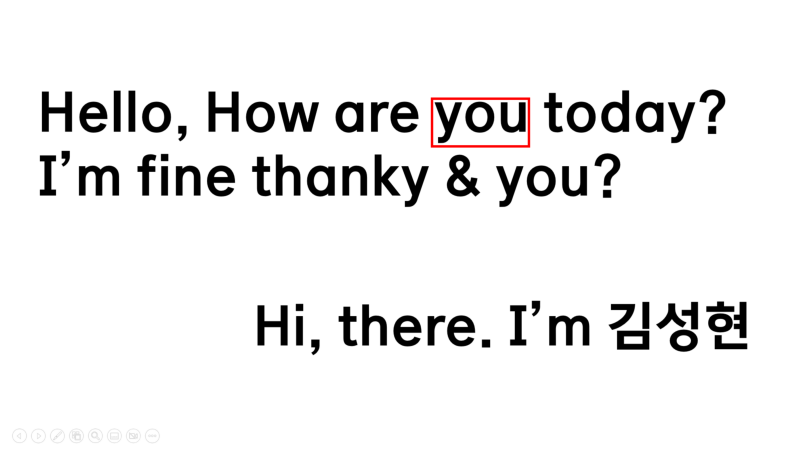

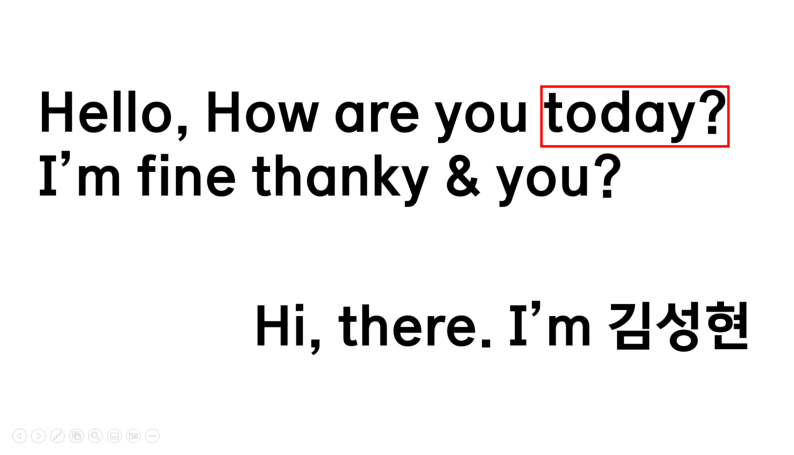

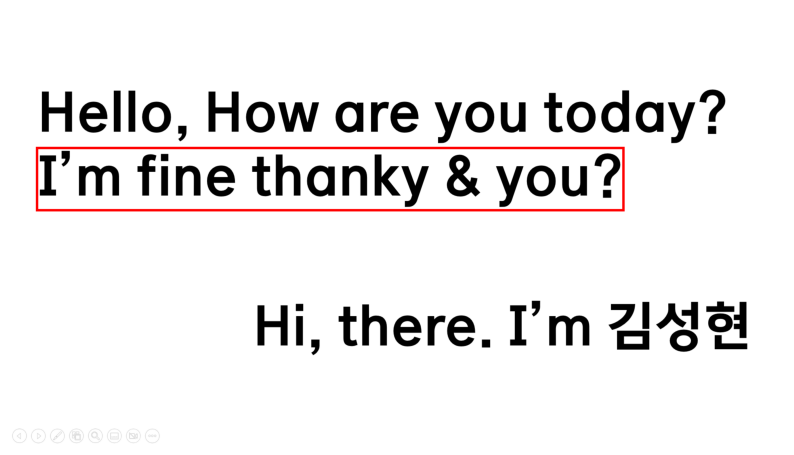

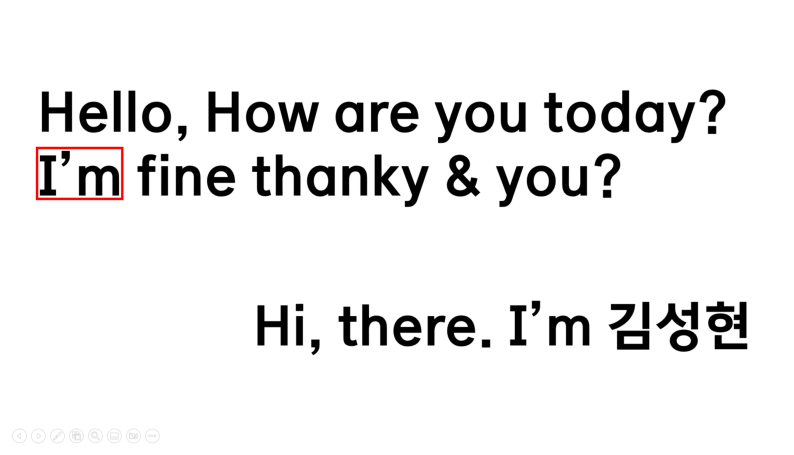

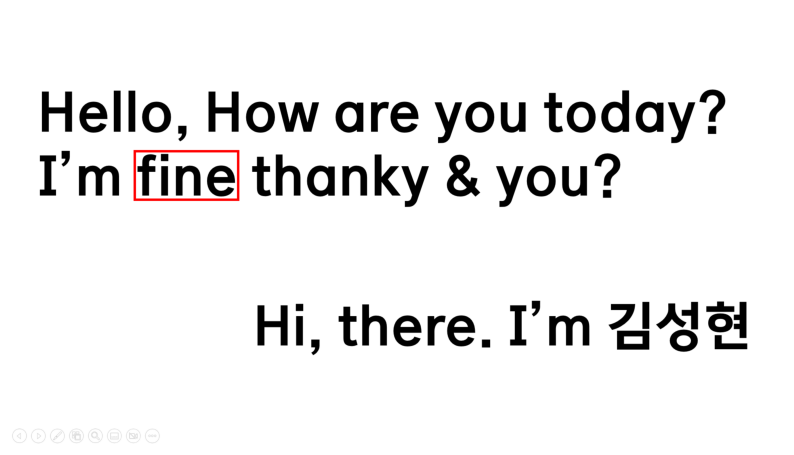

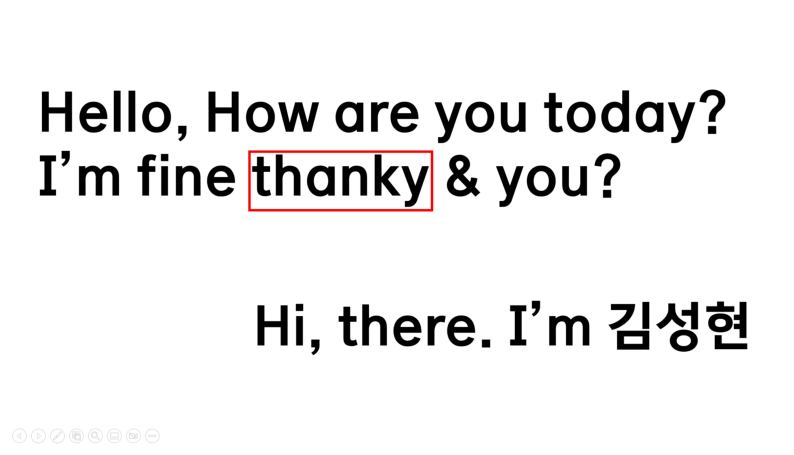

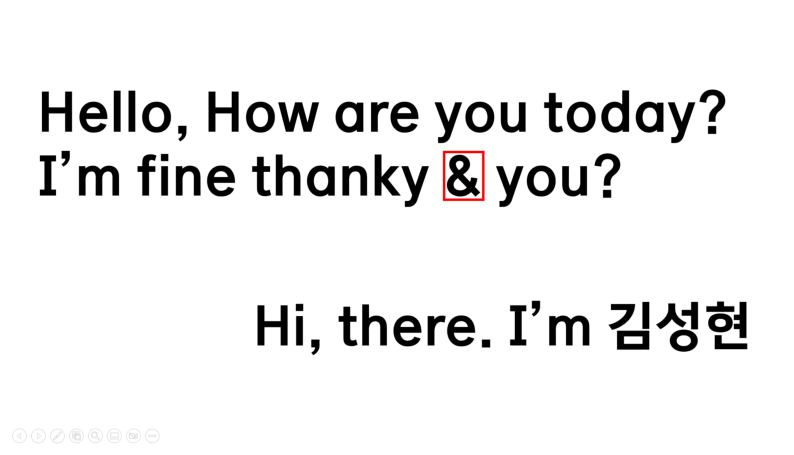

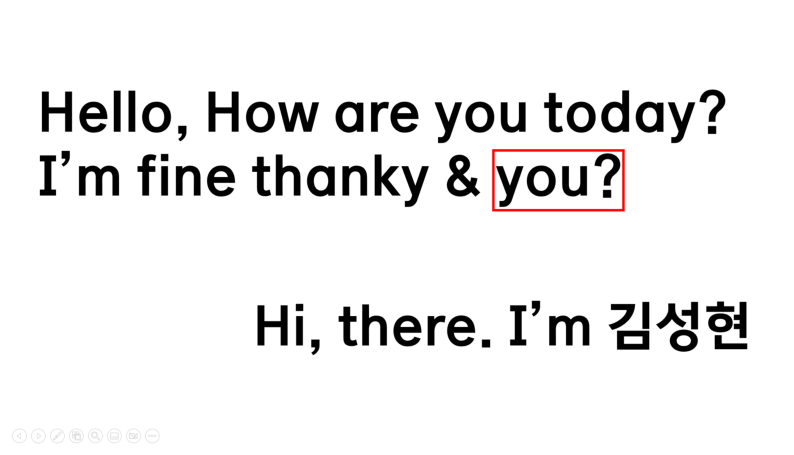

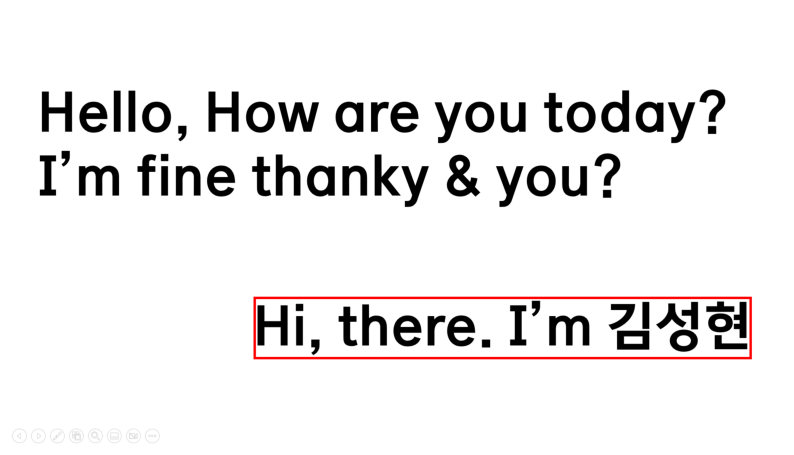

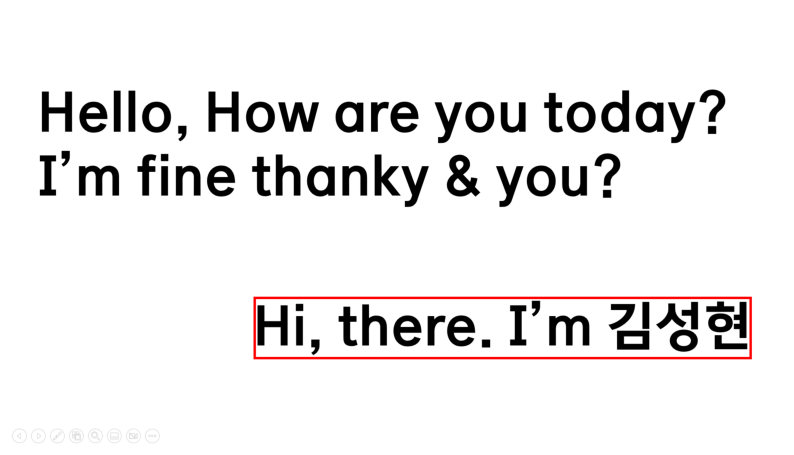

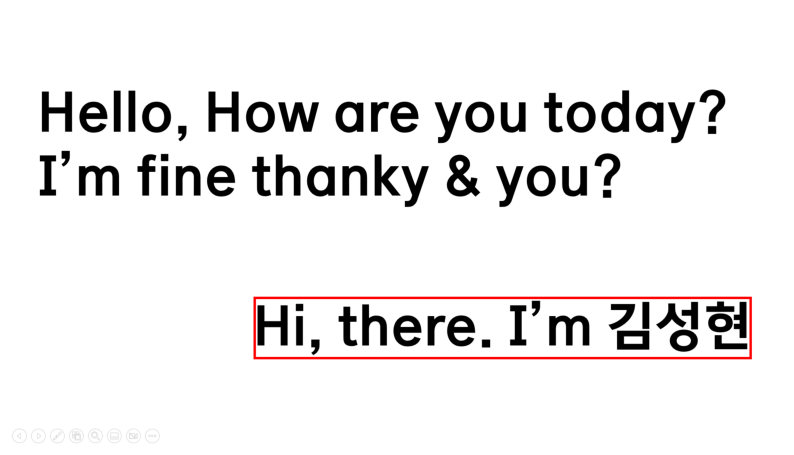

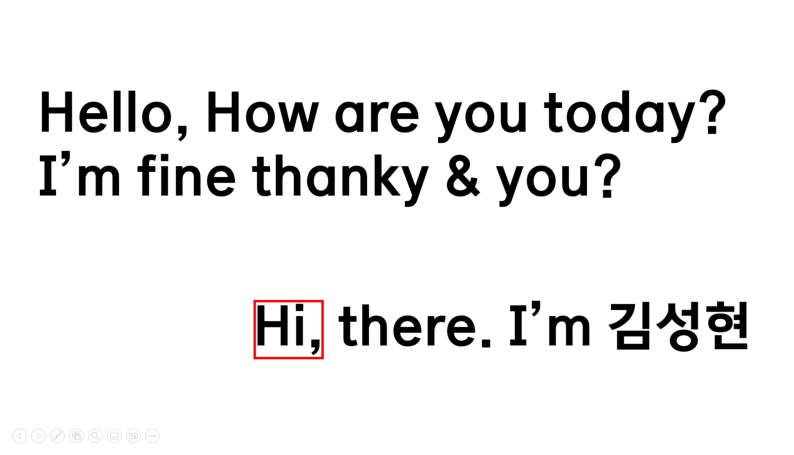

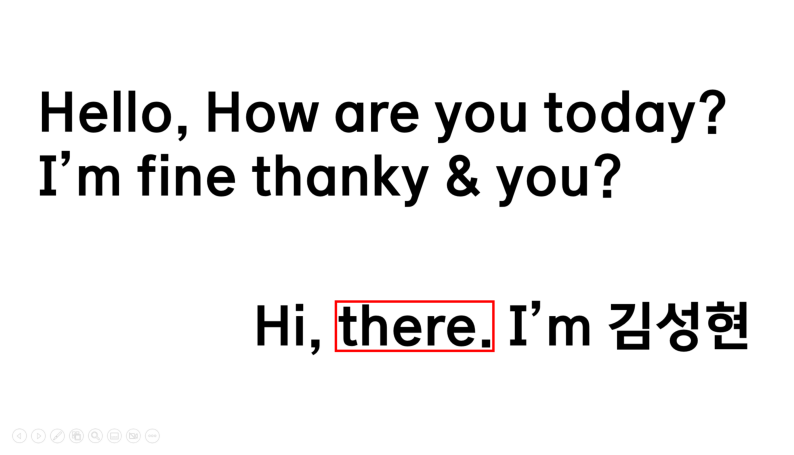

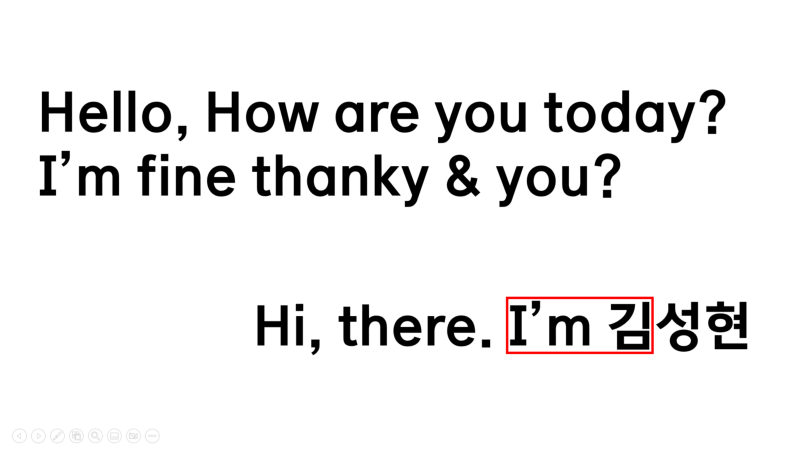

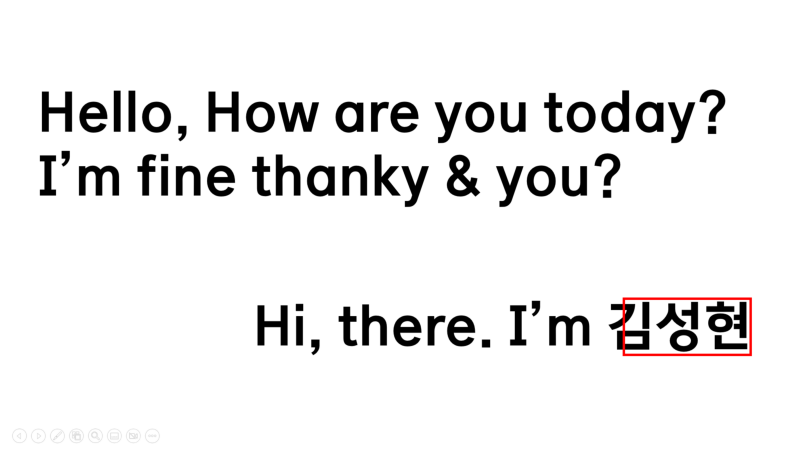

In [13]:
output_folder = "pytesseract_output"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

margin = 10

for i, bbox in enumerate(box_list):
    image_to_draw = image.copy()
    draw = ImageDraw.Draw(image_to_draw)

    top_left = (bbox['left']-margin, bbox['top']-margin)
    bottom_right = (bbox['left'] + bbox['width']+margin, bbox['top'] + bbox['height']+margin)
    draw.rectangle((top_left, bottom_right), outline="red", width=6)


    fig = plt.figure(figsize=(10, 6))
    plt.imshow(image_to_draw)
    plt.axis('off')

    filename = f"test_1 process {i+1:02d}.png"
    save_path = os.path.join(output_folder, filename)
    
    # plt.show()를 호출하기 전에 저장
    plt.savefig(save_path, dpi=300,bbox_inches='tight')

    plt.show()
    plt.close(fig)

### 출처
파이테서렉트 공식문서: https://pypi.org/project/pytesseract/  
동작 원리 -> EasyOCR 까지: https://velog.io/@xpelqpdj0422/11.-OCR-%EA%B8%B0%EC%88%A0%EC%9D%98-%EA%B0%9C%EC%9A%94

